# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
pd.options.mode.chained_assignment = None
from scipy import stats
import math

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

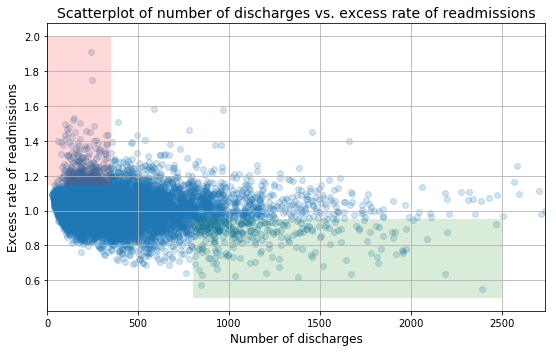

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.




****

### A. Do you agree with the above analysis and recommendations? Why or why not?

**Part A:**

A:

- I would check to see if some of the values in the green and red box could be outliers
- I don't see a strong relationship between the increase number of discharges and decrease of readmission rate


B: Statistics

- There is not data in the graphs showing the hospitals with less than 100 and greater than 1000 number of discharges
- There is not any back up data showing the claims they present

 

C: Conclusion


- They are claiming their is a correlation, but no test or statistical analysis was done.





### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1. Setup an appropriate hypothesis test.

**null:** there is no a difference between the number of discharges with ratio <=1 and the ones with excess readmission ratio>1


**alternative:** there is a difference between the number of discharges with ratio <=1 and the ones with excess readmission ratio>1

#### 2. Compute and report the observed significance value (or p-value).


In [6]:
new_analysis = clean_hospital_read_df
#new_analysis.head()
new_analysis = new_analysis[new_analysis['Number of Readmissions'].notnull()]
new_analysis.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [7]:
# Filtering groups
hosp_less_1 = new_analysis[new_analysis['Excess Readmission Ratio']<=1]
hosp_greater_1 = new_analysis[new_analysis['Excess Readmission Ratio']>1]

g1_discharges = hosp_less_1['Number of Discharges']
g2_discharges =  hosp_greater_1['Number of Discharges']


In [ ]:
hosp_less_1.plot(x='Number of Discharges', y='Excess Readmission Ratio', kind='hist')

In [ ]:
hist(hosp_less_1.n, weights=df.total)

In [ ]:
#plt.hist([1,4,9,16])
plt.hist([hosp_less_1['Number of Discharges']], [hosp_less_1['Excess Readmission Ratio'], bins = [0,1])

In [ ]:
print('(Group1) <=1 mean:', g1_discharges.mean(), '\n')
print('(Group2) >1 mean:', g2_discharges.mean(), '\n')

diff_mean = g1_discharges.mean() - g2_discharges.mean()
print('(difference of means):',diff_mean, '\n')

print('(Group1) <=1 sample size:', len(g1_discharges), '\n')
print('(Group2) >1 sample size:', len(g2_discharges), '\n')

print('(Group1) <=1 Std:', g1_discharges.std(), '\n')
print('(Group2) >1 Std:', g2_discharges.std(), '\n')

#### Standard error(SE)

In [ ]:
standr_error = math.sqrt((322.7539**2/5558) + (294.3093**2/5939))
standr_error

#### Degrees of freedom

In [ ]:
variance = (322.7539**2/5558) + (294.3093**2/5939)
dgr_frdm = variance**2/((322.7539**2/5558)**2/(5558-1) + (294.3093**2/5939)**2/(5939-1))
print('Variance:', variance)
print('Degrees of freedom:', dgr_frdm)

#### t-statistic test

In [ ]:
t_statistic = (g1_discharges.mean()-g2_discharges.mean() - 0)/standr_error
print('t-statistic: ', t_statistic)

In [ ]:
#.05 significance level and degrees of freedom in t-table
marg_error = 1.96*standr_error
print('Marging error: ', marg_error)

#### P-value:

In [ ]:
stats.ttest_ind(hosp_less_1['Number of Discharges'], hosp_greater_1['Number of Discharges'])

p-value: 1.0332472818989955e-07

#### 3. Report statistical significance for $\alpha$ = .01. 


**alpha** = (**1%**)

.01

**p-value** = **00001.03%**

1.0332472818989955e-07
(0.0000001.0332472818989955)


Since our p-value(1.0332472818989955e-07) is less than the significance level of (0.01), **we will reject the null hypothesis.**

For this case, we will go with the alternative hypothesis, which states that there is a significance difference between the number of discharges with excess readmission ratio <=1 and the ones with the number of discharges with excess readmission ratio>1.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In a practical basis, a sample difference of means of 30.64 in number of discharges between the two groups is not very significant.

Even though we can statistically show that there is a difference between these two groups through our p-value, Our recomendation would be that practically speaking, the difference between these two groups are not actually that significant to care for.


**Practical signigicance:**
Practical significance tells us that effect size is the most important component of the research. Practical signigicance should consider the probability and meaningfullness of something happening.

**Statistical significance:**
It gives us the factual numbers of what the numerical probability could be, but doesn't tells us if is actually meaningfull enough to consider it worth taking a look at it or not.

#### Look at the scatterplot above.
- What are the advantages and disadvantages of using this plot to convey information?


1. it specifies what the x and y cordinates represent through titles lebels

2. it is not easy to see the differences between the readmission ratios less than or equal to 1 and the ratios greater than one


- Construct another plot that conveys the same information in a more direct manner.

It would be better if we have two different groups, one with the number of discharges and excess readmission ratio greater than one and another with number of discharges and excess readmission ratio less than one.

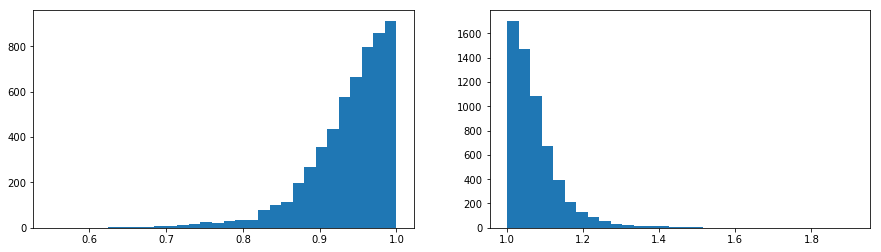

In [47]:
#plt.hist(group_1['Excess Readmission Ratio'],bins=30)
#plt.show()

fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].hist(group_1['Excess Readmission Ratio'],bins=30)
ax[1].hist(group_2['Excess Readmission Ratio'],bins=30)
plt.show()

In [21]:
group_1 = hosp_less_1[['Number of Discharges', 'Excess Readmission Ratio']]
print(group_1.head(3))

group_2 = hosp_greater_1[['Number of Discharges', 'Excess Readmission Ratio']]
print(group_2.head(3))

      Number of Discharges  Excess Readmission Ratio
7628                    51                    0.9871
6664                    52                    1.0000
7120                    52                    0.9938
      Number of Discharges  Excess Readmission Ratio
1832                    25                    1.0914
1699                    27                    1.0961
1774                    28                    1.0934


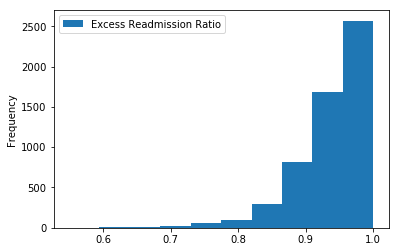

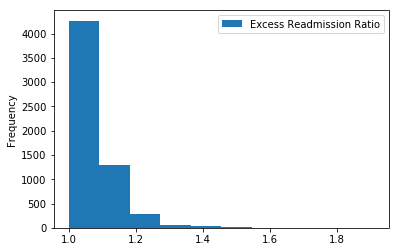

In [22]:
group_1.plot(x='Number of Discharges', y='Excess Readmission Ratio', kind='hist', rot='horizontal')
group_2.plot(x='Number of Discharges', y='Excess Readmission Ratio', kind='hist', rot='horizontal')

This graph shows us the number of discharges against the Readmission Ratio


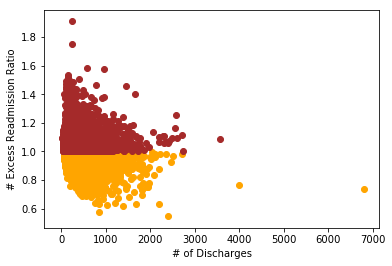

In [23]:
plt.scatter(hosp_less_1['Number of Discharges'], hosp_less_1['Excess Readmission Ratio'], color='orange')
plt.scatter(hosp_greater_1['Number of Discharges'], hosp_greater_1['Excess Readmission Ratio'], color='brown')

plt.xlabel('# of Discharges')
plt.ylabel('# Excess Readmission Ratio')
print('This graph shows us the number of discharges against the Readmission Ratio')

This graph shows us the number of discharges against the Readmission Ratio


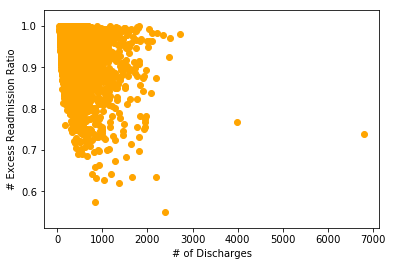

In [24]:
plt.scatter(hosp_less_1['Number of Discharges'], hosp_less_1['Excess Readmission Ratio'], color='orange')

plt.xlabel('# of Discharges')
plt.ylabel('# Excess Readmission Ratio')
print('This graph shows us the number of discharges against the Readmission Ratio')

This graph shows us the number of discharges against the Readmission Ratio


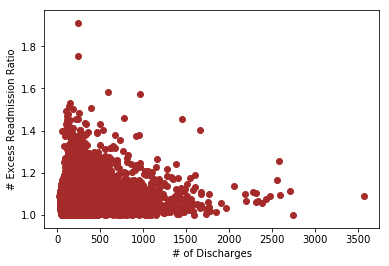

In [20]:
plt.scatter(hosp_greater_1['Number of Discharges'], hosp_greater_1['Excess Readmission Ratio'], color='brown')

plt.xlabel('# of Discharges')
plt.ylabel('# Excess Readmission Ratio')
print('This graph shows us the number of discharges against the Readmission Ratio')